In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io, transform
import torchvision
import torch
from scipy.spatial.transform import Rotation
import PIL

## First training try on shopFacade, 100 epochs

In [6]:
testErr = []
epochs = []

for file in os.listdir("./ShopFacade/run-22-09-20/"):
    if file.startswith("test_"):
        test = np.loadtxt("./ShopFacade/run-22-09-20/"+file)
        e = int((file.split("epoch")[-1]).split(".")[0])
        epochs.append(e)
        testErr.append(test.mean())

plt.figure(figsize=(10,10))

plt.plot(epochs, testErr, ls="", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Mean test distance")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './ShopFacade/run-22-09-20/'

## Translation vectors for different kaggle training sets

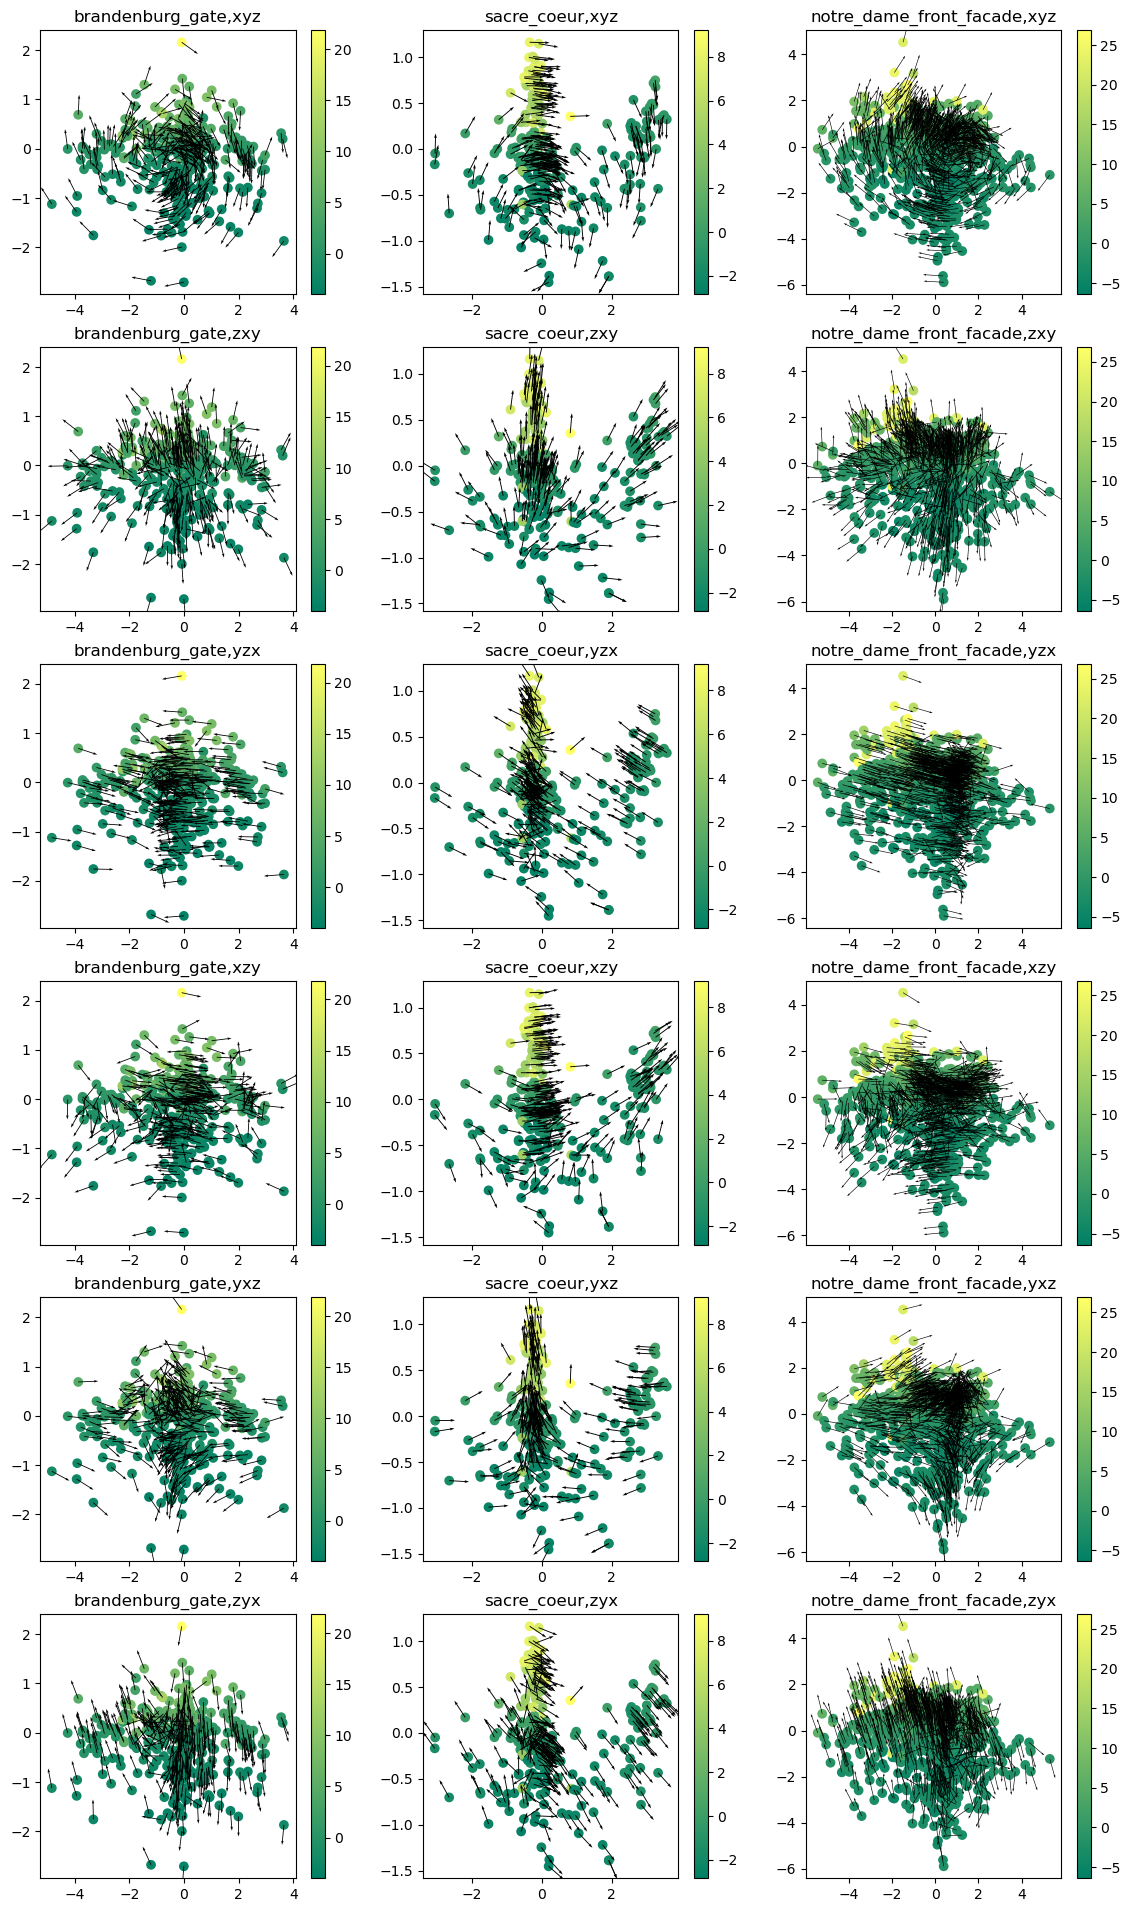

In [ ]:
trainSets = ["./kaggle-data/train/brandenburg_gate/calibration.csv", "./kaggle-data/train/sacre_coeur/calibration.csv", "./kaggle-data/train/notre_dame_front_facade/calibration.csv"]
fig1, ax1 = plt.subplots(6,3, figsize=(14,24))
for q, orientation in enumerate(["xyz","zxy","yzx", "xzy", "yxz", "zyx"]):
    for j, file in enumerate(trainSets):
        calibFile = np.loadtxt(file, dtype = str, skiprows=1, delimiter=",")
        translations = np.array([i.split(" ") for i in calibFile[:,-1]], dtype=float)

        r = np.array([i.split(" ") for i in calibFile[:, 2]], dtype=float)
        r = r.reshape(-1,3,3)

        rots = [Rotation.from_matrix(r[i]) for i in range(r.shape[0])]
        rots = np.array([i.as_euler(orientation) for i in rots])

        norm2DRots = (np.array([rots[:, 0],rots[:, 1]]) / np.linalg.norm(rots[:,:2], axis=1)).T

        k = ax1[q][j].scatter(translations[:,0],translations[:,1], c=translations[:,2], cmap="summer")
        ax1[q][j].quiver(translations[:,0], translations[:,1], norm2DRots[:,0] , norm2DRots[:,1], scale_units = "inches", scale=5)
        ax1[q][j].set_title(file.split("/")[3] + "," + orientation)

        plt.colorbar(k, ax=ax1[q][j])

plt.show()

In [ ]:
trainSets = ["./kaggle-data/train/brandenburg_gate/calibration.csv", "./kaggle-data/train/sacre_coeur/calibration.csv", "./kaggle-data/train/notre_dame_front_facade/calibration.csv"]
fig1, ax1 = plt.subplots(6,3, figsize=(14,24))
for q, orientation in enumerate(["xyz","zxy","yzx", "xzy", "yxz", "zyx"]):
    for j, file in enumerate(trainSets):
        calibFile = np.loadtxt(file, dtype = str, skiprows=1, delimiter=",")
        translations = np.array([i.split(" ") for i in calibFile[:,-1]], dtype=float)

        r = np.array([i.split(" ") for i in calibFile[:, 2]], dtype=float)
        r = r.reshape(-1,3,3)

        rots = [Rotation.from_matrix(r[i]) for i in range(r.shape[0])]
        rots = np.array([i.as_euler(orientation) for i in rots])

        norm2DRots = (np.array([rots[:, 0],rots[:, 1]]) / np.linalg.norm(rots[:,:2], axis=1)).T

        k = ax1[q][j].scatter(translations[:,0],translations[:,1], c=translations[:,2], cmap="summer")
        ax1[q][j].quiver(translations[:,0], translations[:,1], norm2DRots[:,0] , norm2DRots[:,1], scale_units = "inches", scale=5)
        ax1[q][j].set_title(file.split("/")[3] + "," + orientation)

        plt.colorbar(k, ax=ax1[q][j])

plt.show()

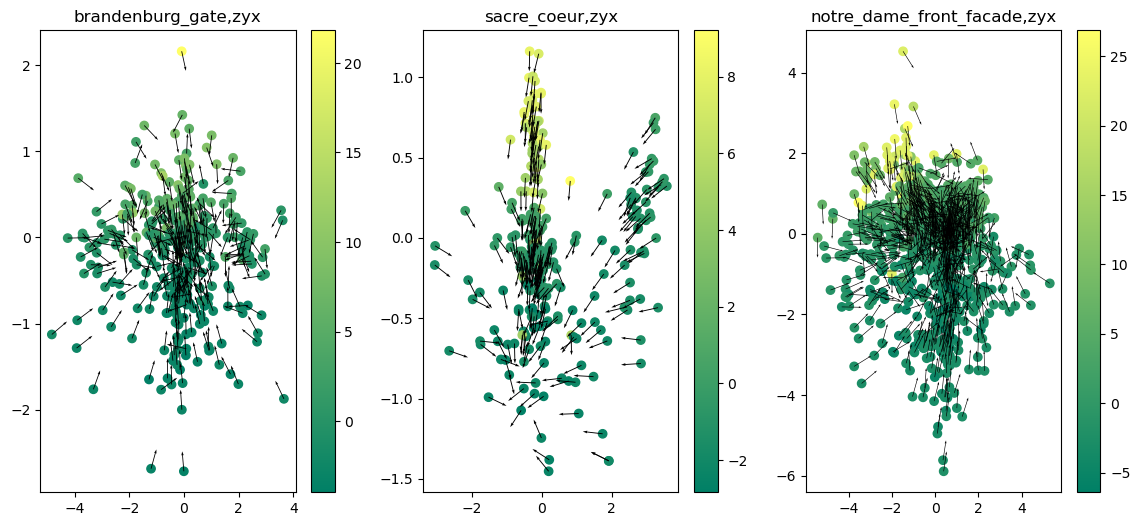

In [ ]:
# minus zxy looks the best (at least for sacre coeur)
trainSets = ["./kaggle-data/train/brandenburg_gate/calibration.csv", "./kaggle-data/train/sacre_coeur/calibration.csv", "./kaggle-data/train/notre_dame_front_facade/calibration.csv"]
fig1, ax1 = plt.subplots(1,3, figsize=(14,6))
for j, file in enumerate(trainSets):
        calibFile = np.loadtxt(file, dtype = str, skiprows=1, delimiter=",")
        translations = np.array([i.split(" ") for i in calibFile[:,-1]], dtype=float)

        r = np.array([i.split(" ") for i in calibFile[:, 2]], dtype=float)
        r = r.reshape(-1,3,3)

        rots = [Rotation.from_matrix(r[i]) for i in range(r.shape[0])]
        rots = np.array([i.as_euler("zxy") for i in rots])

        norm2DRots = -(np.array([rots[:, 0],rots[:, 1]]) / np.linalg.norm(rots[:,:2], axis=1)).T

        k = ax1[j].scatter(translations[:,0],translations[:,1], c=translations[:,2], cmap="summer")
        ax1[j].quiver(translations[:,0], translations[:,1], norm2DRots[:,0] , norm2DRots[:,1], scale_units = "inches", scale=5)
        ax1[j].set_title(file.split("/")[3] + "," + orientation)

        plt.colorbar(k, ax=ax1[j])

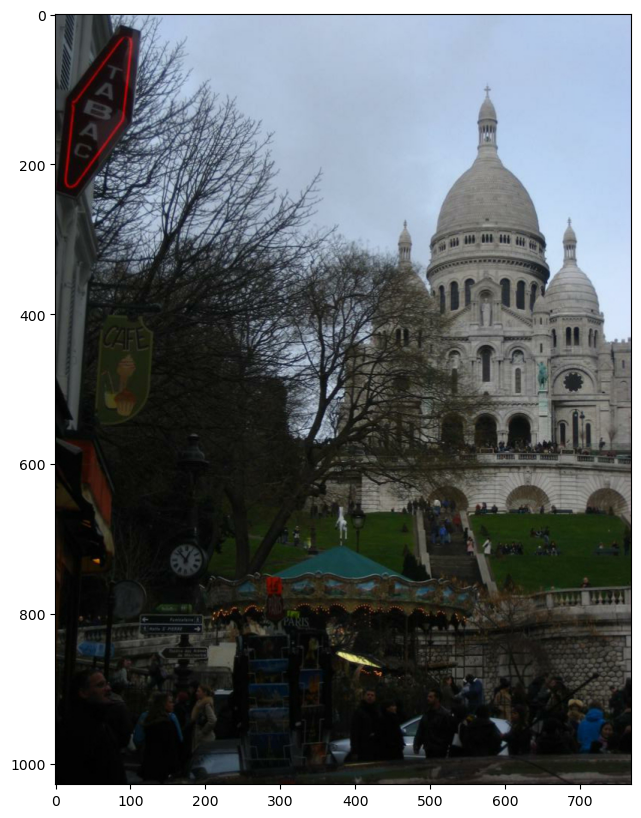

In [ ]:
calibFile = np.loadtxt("./kaggle-data/train/sacre_coeur/calibration.csv", dtype = str, skiprows=1, delimiter=",")
translations = np.array([i.split(" ") for i in calibFile[:,-1]], dtype=float)
im = PIL.Image.open("./kaggle-data/train/sacre_coeur/images/"+calibFile[np.argmax(translations[:,2]), 0]+".jpg")
plt.figure(figsize=(12,10))
plt.imshow(im)
plt.show()

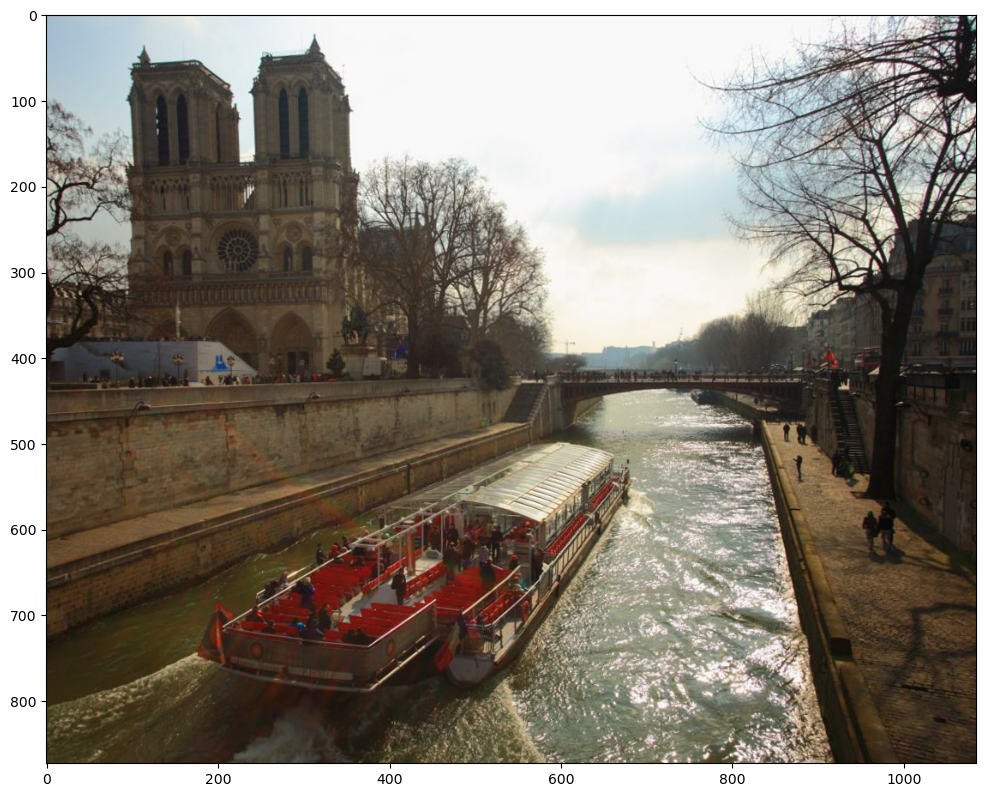

In [ ]:
calibFile = np.loadtxt("./kaggle-data/train/notre_dame_front_facade/calibration.csv", dtype = str, skiprows=1, delimiter=",")
translations = np.array([i.split(" ") for i in calibFile[:,-1]], dtype=float)
im = PIL.Image.open("./kaggle-data/train/notre_dame_front_facade/images/"+calibFile[np.argmin(translations[:,0]), 0]+".jpg")
plt.figure(figsize=(12,10))
plt.imshow(im)
plt.show()

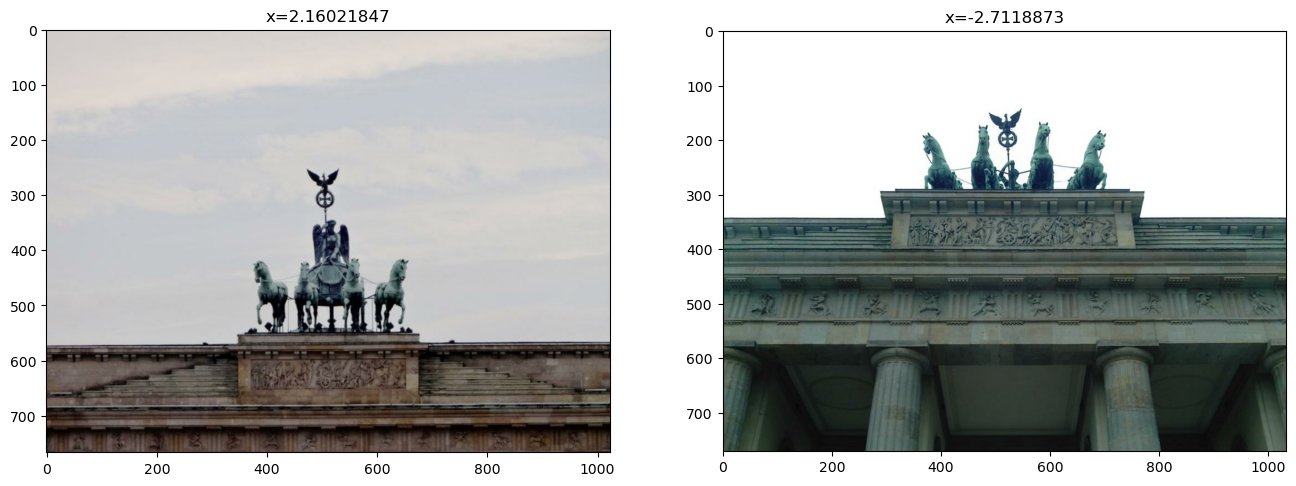

In [ ]:
calibFile = np.loadtxt("./kaggle-data/train/brandenburg_gate/calibration.csv", dtype = str, skiprows=1, delimiter=",")
translations = np.array([i.split(" ") for i in calibFile[:,-1]], dtype=float)
im = PIL.Image.open("./kaggle-data/train/brandenburg_gate/images/"+calibFile[np.argmax(translations[:,1]), 0]+".jpg")
im2 = PIL.Image.open("./kaggle-data/train/brandenburg_gate/images/"+calibFile[np.argmin(translations[:,1]), 0]+".jpg")
fig3,ax3 = plt.subplots(1,2,figsize=(16,8))
ax3[0].imshow(im)
ax3[0].set_title(f"y={np.max(translations[:,1])}")
ax3[1].imshow(im2)
ax3[1].set_title(f"y={np.min(translations[:,1])}")

plt.show()

The translation vectors are hard to use, since their origin is defined by the average translation vector (the average of all should be [0,0,0], at least it looks like it).

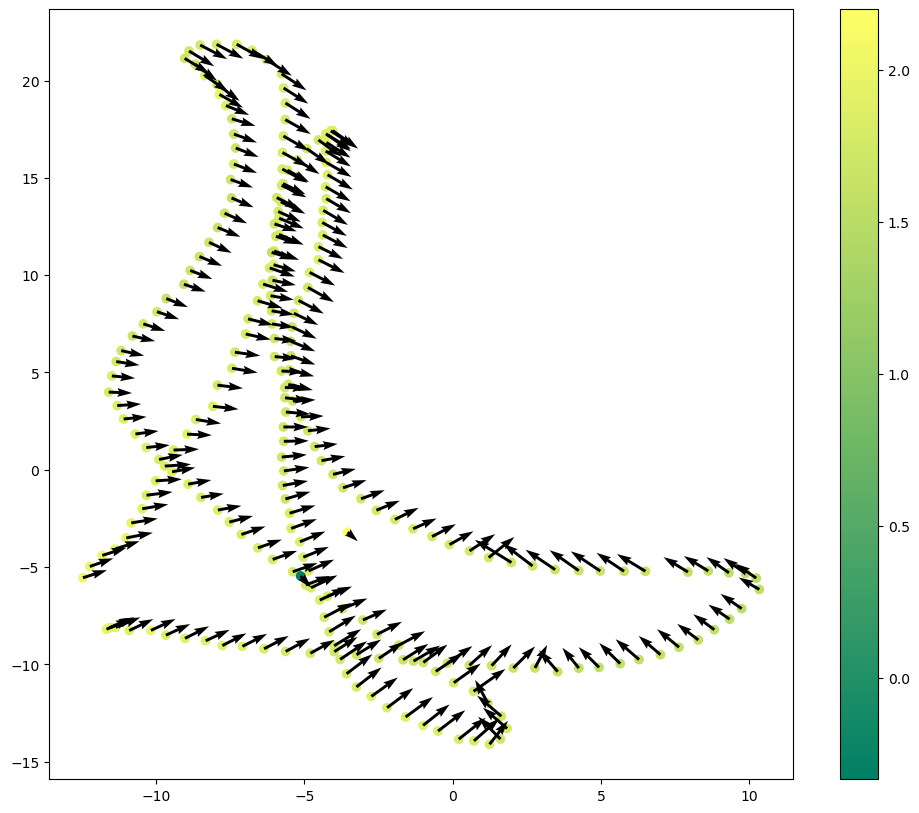

In [ ]:
calibFile = np.loadtxt("./ShopFacade/dataset_train.txt", skiprows=3, dtype=str, delimiter=" ")
translations = np.array(calibFile[:, 1:4], dtype = float)
rots = np.array([Rotation.from_quat(calibFile[i,4:]).as_euler("xzy") for i in range(calibFile.shape[0])])

plt.figure(figsize = (12,10))

k = plt.scatter(translations[:,0], translations[:,1], c=translations[:,2], cmap="summer")
plt.quiver(translations[:,0], translations[:,1], rots[:,0], rots[:,1])

plt.colorbar(k)
plt.show()


## Test to form visual intuition for scaling process used in anchorNet

TypeError: Invalid shape (1080, 224, 224) for image data

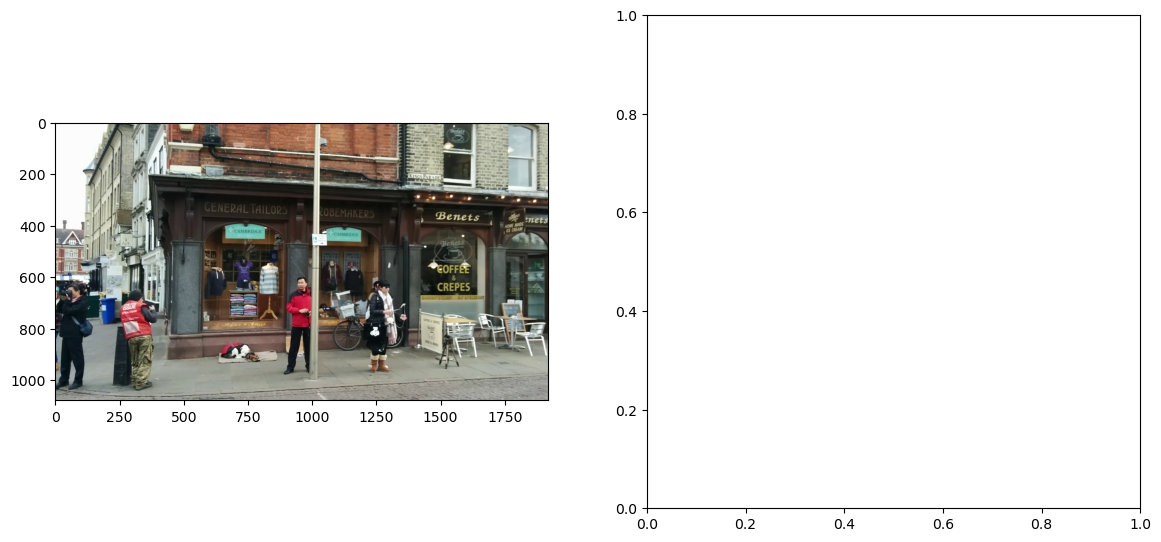

In [ ]:
orig = io.imread("./ShopFacade/seq1/frame00001.png")

trans = torchvision.transforms.Resize((224,224))
transIm = trans(torch.from_numpy(trans))

print(transIm.size())

fig2, ax2 = plt.subplots(1,2, figsize=(14, 7))

ax2[0].imshow(orig)
ax2[1].imshow(transIm)

plt.show()

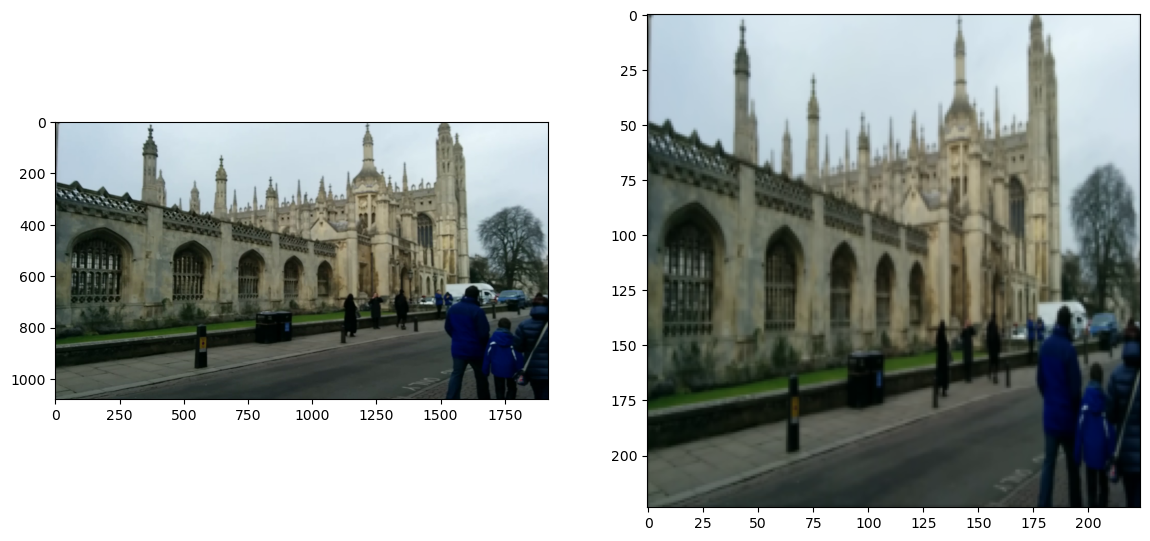

In [ ]:
orig = io.imread("./KingsCollege/seq1/frame00001.png")

trans = transform.resize(orig, (224,224), mode="constant")

fig2, ax2 = plt.subplots(1,2, figsize=(14, 7))

ax2[0].imshow(orig)
ax2[1].imshow(trans)

plt.show()